# Loading Dataset

In [0]:
data = spark.sql('SELECT * FROM amazon_apps')
data = data.toPandas()
data.head()

Out[1]:

,reviewText,Positive
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,1
2,this is a really cool game. there are a bunch ...,1
3,"This is a silly game and can be frustrating, b...",1
4,This is a terrific game on any pad. Hrs of fun...,1


In [0]:
# drop label column as we don't need it for topic modeling
data.drop('Positive', axis=1, inplace=True)
data.head()

Out[2]:

,reviewText
0,This is a one of the best apps acording to a b...
1,This is a pretty good version of the game for ...
2,this is a really cool game. there are a bunch ...
3,"This is a silly game and can be frustrating, b..."
4,This is a terrific game on any pad. Hrs of fun...


In [0]:
data.isnull().sum()

Out[3]: reviewText 0
dtype: int64

In [0]:
data.sort_values(by='reviewText', ascending=True).head()

Out[4]:

,reviewText
6573,"""""""Calculator Ultimate"""" is an outstanding cal..."
17398,"""""""CircleLauncher"""" is a clever app that allow..."
6701,"""""""ComicCat"""" is my first and last comic book ..."
14001,"""""""Drawing Pad"""" is exactly what a drawing app..."
10262,"""""""Farkle"""" is a fun"


In [0]:
data.sort_values(by='reviewText', ascending=False).head()

Out[5]:

,reviewText
12562,"~~~~~~Happy April Fools, Superman!Your FAOTD r..."
12180,~All this app stuff is new &amp; confusing to ...
10900,zappos is like magic. They will get your prod...
8183,ytuydf gdthcf hdhjcc t t t t y y yby Rh. y Cb ...
3085,your mom is the worst hahaha but the game has ...


# Text Preprocessing

In [0]:
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data] | 
[nltk_data] | Downloading package abc to /root/nltk_data...
[nltk_data] | Unzipping corpora/abc.zip.
[nltk_data] | Downloading package alpino to /root/nltk_data...
[nltk_data] | Unzipping corpora/alpino.zip.
[nltk_data] | Downloading package averaged_perceptron_tagger to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] | Downloading package averaged_perceptron_tagger_ru to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping
[nltk_data] | taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data] | Downloading package basque_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping grammars/basque_grammars.zip.
[nltk_data] | Downloading package biocreative_ppi to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/biocreative_ppi.zip.
[nltk_data] | Downloading package bllip_wsj_no_aux to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping models/bllip_wsj_no_aux.zip.
[nltk_data] | Downloading package book_grammars to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping grammars/book_grammars.zip.
[nltk_data] | Downloading package brown to /root/nltk_data...
[nltk_data] | Unzipping corpora/brown.zip.
[nltk_data] | Downloading package brown_tei to /root/nltk_data...
[nltk_data] | Unzipping corpora/brown_tei.zip.
[nltk_data] | Downloading package cess_cat to /root/nltk_data...
[nltk_data] | Unzipping corpora/cess_cat.zip.
[nltk_data] | Downloading package cess_esp to /root/nltk_data...
[nltk_data] | Unzipping corpora/cess_esp.zip.
[nltk_data] | Downloading package chat80 to /root/nltk_data...
[nltk_data] | Unzipping corpora/chat80.zip.
[nltk_data] | Downloading package city_database to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/city_database.zip.
[nltk_data] | Downloading package cmudict to /root/nltk_data...
[nltk_data] | Unzipping corpora/cmudict.zip.
[nltk_data] | Downloading package comparative_sentences to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/comparative_sentences.zip.
[nltk_data] | Downloading package comtrans to /root/nltk_data...
[nltk_data] | Downloading package conll2000 to /root/nltk_data...
[nltk_data] | Unzipping corpora/conll2000.zip.
[nltk_data] | Downloading package conll2002 to /root/nltk_data...
[nltk_data] | Unzipping corpora/conll2002.zip.
[nltk_data] | Downloading package conll2007 to /root/nltk_data...
[nltk_data] | Downloading package crubadan to /root/nltk_data...
[nltk_data] | Unzipping corpora/crubadan.zip.
[nltk_data] | Downloading package dependency_treebank to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/dependency_treebank.zip.
[nltk_data] | Downloading package dolch to /root/nltk_data...
[nltk_data] | Unzipping corpora/dolch.zip.
[nltk_data] | Downloading package europarl_raw to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/europarl_raw.zip.
[nltk_data] | Downloading package floresta to /root/nltk_data...
[nltk_data] | Unzipping corpora/floresta.zip.
[nltk_data] | Downloading package framenet_v15 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/framenet_v15.zip.
[nltk_data] | Downloading package framenet_v17 to
[nltk_data] | /root/nltk_data...
[nltk_data] | Unzipping corpora/framenet_v17.zip.
[nltk_data] | Downloading package gazetteers to /root/nltk_data...
[nltk_data] | Unzipping corpora/gazetteers.zip.
[nltk_data] | Downloading package genesis to /root/nltk_data...
[nltk_data] | Unzipping corpora/genesis.zip.
[nltk_data] | Downloading package gutenberg to /root/nltk_data...
[nltk_data] | Unzipping corpora/gutenberg.zip.
[nltk_data] | Downloading package ieer to /root/nltk_data...
[nltk_data] | Unzipping corpora/ieer.zip.
[nltk_data] | Downloading package inaugural to /root/nltk_data...
[nltk_data] | Unzipping corpora/inaugural.zip.
[nltk_data] | Downloading package indian to /root/nltk_data...
[nltk_data] | Unzipping corpora/indian.zip.
[nltk_d

In [0]:
# create a list of text data from dataframe
text = list(data['reviewText'])
type(text), len(text)

Out[7]: (list, 19999)

In [0]:
import re
from nltk.corpus import stopwords

from nltk.stem import WordNetLemmatizer
lemmatizer = WordNetLemmatizer()

corpus = []

for i in range(len(text)):
    r = re.sub('[^a-zA-Z]', ' ', text[i])
    r = r.lower()
    r = r.split()
    r = [word for word in r if word not in stopwords.words('english')]
    r = [lemmatizer.lemmatize(word) for word in r]
    r = ' '.join(r)
    corpus.append(r)

In [0]:
for i in corpus[:10]:
    print(i)
    print('--------')

one best apps acording bunch people agree bomb egg pig tnt king pig realustic stuff
--------
pretty good version game free lot different level play kid enjoy lot
--------
really cool game bunch level find golden egg super fun
--------
silly game frustrating lot fun definitely recommend fun time
--------
terrific game pad hr fun grandkids love great entertainment waiting long line
--------
entertaining game smart play guess like easy fun game suppose warned game highly addictive
--------
awesome need wi ti play trust really fun addicting like level even free waste money expensive one mean seriously get app
--------
awesome bet one even read review know game good need
--------
basicly free version ad actually awesome addicting free time really reccomend
--------
far best free app available anywhere helped pas time nothing else would pas one p hate word minimum
--------

# Vectorization

In [0]:
# Vectorizer
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(stop_words = 'english', min_df = 10)
doc = cv.fit_transform(corpus)

In [0]:
# see the type of doc
doc

Out[11]: <19999x2571 sparse matrix of type '<class 'numpy.int64'>'
	with 230418 stored elements in Compressed Sparse Row format>

In [0]:
# if you want to see it as a dataframe 
import pandas as pd
df = pd.DataFrame(doc.toarray(), columns = cv.get_feature_names())
df.head()

Out[12]:

,ability,able,absolute,absolutely,access,accessible,accident,accidentally,accomplished,according,account,accuracy,accurate,acer,achievement,act,action,active,activity,actual,actually,ad,add,added,addicted,addicting,addictive,adding,addition,additional,address,adjust,adjustable,admit,adobe,adorable,adore,adult,advance,advanced,...,worry,worse,worst,worth,worthless,worthwhile,worthy,wouldnt,wow,write,writer,writing,written,wrong,wrote,wtf,ww,xbox,xoom,xtreme,ya,yahoo,yay,yea,yeah,year,yes,yesterday,yo,yoga,young,younger,youngest,youtube,yr,zappos,zero,zombie,zone,zoom
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


# Latent Dirichlet Allocation

In [0]:
# Topic model with 10 topics
from sklearn.decomposition import LatentDirichletAllocation
LDA = LatentDirichletAllocation(n_components=10, random_state=123)

In [0]:
# This can long time
LDA.fit(doc)

Out[14]: LatentDirichletAllocation(random_state=123)

In [0]:
LDA.components_.shape

Out[15]: (10, 2571)

In [0]:
pd.DataFrame(LDA.components_, columns = cv.get_feature_names())

Out[16]:

,ability,able,absolute,absolutely,access,accessible,accident,accidentally,accomplished,according,account,accuracy,accurate,acer,achievement,act,action,active,activity,actual,actually,ad,add,added,addicted,addicting,addictive,adding,addition,additional,address,adjust,adjustable,admit,adobe,adorable,adore,adult,advance,advanced,...,worry,worse,worst,worth,worthless,worthwhile,worthy,wouldnt,wow,write,writer,writing,written,wrong,wrote,wtf,ww,xbox,xoom,xtreme,ya,yahoo,yay,yea,yeah,year,yes,yesterday,yo,yoga,young,younger,youngest,youtube,yr,zappos,zero,zombie,zone,zoom
0,31.154129,141.803768,3.173409,30.130630,69.389211,14.886678,2.174781,0.100018,0.100003,2.272042,43.302184,0.100026,0.313983,0.100008,0.100000,13.619944,0.100017,0.100012,0.100007,8.602862,45.547039,10.015749,97.810270,22.469785,0.100008,0.100002,0.100002,21.540258,11.711209,11.101662,0.100016,0.195806,7.435642,0.100035,23.515933,0.100001,0.100004,0.100000,0.100018,6.451085,...,0.100023,5.707193,0.100004,99.292650,2.202853,6.748948,5.806104,0.100001,8.192009,0.100011,1.239230,2.730184,0.106575,17.638579,0.100003,0.100001,2.709695,5.825576,0.467134,0.100001,0.100005,0.100014,0.100025,21.696757,3.120717,45.631534,13.084765,0.100010,0.100008,0.100011,0.100008,0.100004,0.100000,245.918425,0.100002,0.100002,0.100017,0.100001,0.100057,0.100018
1,0.100573,0.300149,6.026424,23.733276,0.100008,0.100006,0.100022,2.720573,0.100006,3.360443,0.103913,0.100889,0.100007,0.100008,0.100000,7.054625,6.269583,0.100001,0.100407,0.100013,68.403773,71.990606,13.234848,0.100011,0.100009,3.386802,0.100005,0.100010,0.100010,0.100016,0.100006,0.100003,0.100007,8.160252,0.100004,0.100006,0.100002,0.101002,2.563399,0.100006,...,7.296537,30.956687,121.389345,294.540343,0.100031,0.100007,9.657721,10.292731,38.564230,18.630941,4.965372,21.382693,15.313791,59.024440,2.319208,12.605251,0.100003,2.488526,0.100010,0.100003,21.216130,1.119891,0.100010,4.503123,19.834719,0.382568,20.310183,3.147458,38.902984,6.443620,1.757728,9.433012,0.100003,0.281547,0.100006,0.100004,44.384945,0.100029,0.100000,0.100007
2,28.295543,52.823718,3.317017,12.778078,0.100005,0.100005,0.100047,0.100050,8.714701,0.100034,0.100003,0.100017,11.794603,0.100001,0.100000,0.100023,0.100018,7.535108,12.936191,5.802336,45.413192,0.100010,0.100046,0.127993,0.100011,0.100002,0.100004,0.100038,19.219574,0.100011,0.100005,23.614366,2.764287,0.778404,0.100000,0.100005,0.100026,0.100004,2.874764,16.734970,...,0.100198,0.100018,0.100002,26.165000,0.100007,0.100002,0.100008,0.107579,0.100048,0.100010,0.100002,0.138117,0.100007,4.061606,0.100023,0.100001,6.927600,0.100000,0.100013,18.099987,0.100008,0.100006,9.842676,0.100000,0.100030,50.686478,5.281256,0.100030,0.100007,0.100016,0.100000,2.307151,0.100009,0.100001,0.100005,0.100001,0.100010,0.100001,5.439898,0.100014
3,0.100840,0.100018,0.100053,9.112551,0.100007,0.100008,0.100005,7.187451,0.100003,0.100022,0.100005,0.100000,0.100004,0.100010,0.100025,1.789029,34.005491,0.100003,0.100010,7.508866,88.210150,0.100018,9.584194,5.165744,0.102578,6.457258,13.593010,0.100020,4.352614,19.955080,0.100007,0.100022,0.100015,0.100017,0.100018,7.155520,1.394422,1.851108,0.100019,0.100063,...,0.100029,13.636037,2.810634,31.856459,0.100022,0.100007,0.100031,0.178654,10.217879,2.487980,0.100114,0.100016,0.100012,13.595724,0.207262,6.594705,0.100000,0.100016,39.211790,0.100002,1.059503,0.100000,1.280326,0.100010,11.680108,0.102625,37.405648,0.100035,0.100061,0.100003,0.100004,0.100002,0.100000,0.100002,0.100003,0.100004,13.453647,23.099904,0.100004,6.991223
4,0.101349,35.549656,0.100011,58.346592,0.100012,0.100001,0.100017,0.100004,0.100049,0.100034,0.100006,1.515222,0.100010,0.100001,0.100008,3.825939,0.100019,0.100006,0.100001,1.707027,9.987402,0.100097,14.799228,5.872243,0.100012,3.903114,0.100005,4.511407,0.963550,0.100008,0.100004,0.100018,0.100011,1.213416,0.100004,0.100029,6.194365,74.218156,0.100001,0.113826,...,0.100049,0.100004,0.100001,34.798189,0.100005,0.100001,0.100052,0.100000,15.454924,0

In [0]:
# see the most common words by topic
for index,topic in enumerate(LDA.components_):
    print(f'THE TOP 30 WORDS FOR TOPIC #{index}')
    print([cv.get_feature_names()[i] for i in topic.argsort()[:30]])
    print('\n')

THE TOP 30 WORDS FOR TOPIC #0
['woken', 'farming', 'lord', 'nkjv', 'reservation', 'pearl', 'niv', 'studying', 'teamlava', 'king', 'pl', 'blessing', 'achievement', 'creature', 'bos', 'iaps', 'boyfriend', 'twin', 'introduced', 'tetri', 'traffic', 'born', 'fascinate', 'mindless', 'pin', 'wast', 'pinball', 'bejeweled', 'rovio', 'quarterly']


THE TOP 30 WORDS FOR TOPIC #1
['dolphin', 'nasb', 'farming', 'expansion', 'unresponsive', 'lab', 'studying', 'printer', 'dungeon', 'document', 'gradually', 'jot', 'preacher', 'ic', 'grid', 'achievement', 'highlighting', 'coordination', 'cruz', 'explorer', 'gesture', 'traffic', 'preview', 'passage', 'sermon', 'graffiti', 'seamlessly', 'technical', 'flawless', 'soothing']


THE TOP 30 WORDS FOR TOPIC #2
['crayon', 'stamp', 'blah', 'syncing', 'informant', 'spanish', 'shortcut', 'translator', 'bless', 'missile', 'nkjv', 'harm', 'studying', 'cream', 'printer', 'shoe', 'candy', 'crush', 'shazam', 'swype', 'teamlava', 'reply', 'gin', 'dropbox', 'cnet', 'preacher', 'achievement', 'cbr', 'troll', 'educational']


THE TOP 30 WORDS FOR TOPIC #3
['crayon', 'christ', 'nasb', 'woken', 'gmail', 'gently', 'turbo', 'farming', 'marker', 'james', 'turbotax', 'nkjv', 'quietly', 'niv', 'symptom', 'tecarta', 'jot', 'cbr', 'organizing', 'paste', 'highlight', 'educational', 'calculating', 'evening', 'conversation', 'calorie', 'organizes', 'watcher', 'printing', 'habit']


THE TOP 30 WORDS FOR TOPIC #4
['reboot', 'unplayable', 'informant', 'lord', 'nkjv', 'barcode', 'atari', 'studying', 'cream', 'cardio', 'defrag', 'qr', 'dropbox', 'tecarta', 'synced', 'cbr', 'organizing', 'honeycomb', 'closer', 'explorer', 'bing', 'watcher', 'tournament', 'unusable', 'march', 'supported', 'rovio', 'switching', 'translate', 'technical']


THE TOP 30 WORDS FOR TOPIC #5
['flame', 'unplayable', 'rummy', 'farming', 'unresponsive', 'trainer', 'reservation', 'atari', 'pearl', 'crush', 'swype', 'cnet', 'dance', 'ruined', 'boyfriend', 'pushing', 'coordination', 'storyline', 'twin', 'introduced', 'calorie', 'gesture', 'boredom', 'creepy', 'graffiti', 'pinball', 'bejeweled', 'database', 'jamie', 'scary']


THE TOP 30 WORDS FOR TOPIC #6
['xtreme', 'sleeper', 'crescendo', 'fade', 'gentle', 'christ', 'inkpad', 'nasb', 'shipping', 'woken', 'gmail', 'syncing', 'turbo', 'james', 'turbotax', 'woke', 'ringtone', 'translator', 'bless', 'nkjv', 'trainer', 'barcode', 'harm', 'niv', 'studying', 'printer', 'shoe', 'identity', 'cardio', 'defrag']


THE TOP 30 WORDS FOR TOPIC #7
['sleeper', 'louder', 'woke', 'lord', 'hairy', 'atari', 'pearl', 'rain', 'ruined', 'mission', 'coordination', 'tournament', 'microphone', 'gross', 'creepy', 'pinball', 'plant', 'punch', 'scary', 'bet', 'vega', 'monster', 'duck', 'stupidest', 'sudden', 'calm', 'soooooooo', 'plz', 'anger', 'hair']


THE TOP 30 WORDS FOR TOPIC #8
['blah', 'christ', 'dolphin', 'nasb', 'syncing', 'cbs', 'unresponsive', 'lab', 'bless', 'chrome', 'nkjv', 'quietly', 'barcode', 'reservation', 'harm', 'niv', 'studying', 'cream', 'identity', 'defrag', 'jesus', 'sooooooo', 'pr', 'blessing', 'preacher', 'root', 'import', 'cruz', 'rude', 'bookmark']


THE TOP 30 WORDS FOR TOPIC #9
['fade', 'dismiss', 'expansion', 'unresponsive', 'plex', 'quietly', 'printer', 'candy', 'defrag', 'crush', 'bos', 'honeycomb', 'boyfriend', 'acer', 'toy', 'import', 'vids', 'rude', 'whiteboard', 'fascinate', 'export', 'wast', 'vevo', 'clip', 'ugly', 'pinball', 'supported', 'earned', 'jamie', 'shooter']

In [0]:
# applying the model to dataset
topic_results = LDA.transform(doc)
data_topics = pd.DataFrame(topic_results)
data_topics.head()

Out[18]:

,0,1,2,3,4,5,6,7,8,9
0,0.008337,0.576588,0.008335,0.008335,0.008336,0.199278,0.008334,0.008334,0.165788,0.008334
1,0.007693,0.007693,0.007693,0.007693,0.007694,0.007693,0.538940,0.007693,0.399515,0.007693
2,0.011112,0.011119,0.011112,0.011113,0.536360,0.011112,0.374735,0.011111,0.011115,0.011112
3,0.010001,0.010001,0.010001,0.010002,0.010001,0.010001,0.909991,0.010001,0.010001,0.010001
4,0.008334,0.008334,0.008337,0.008334,0.190268,0.008334,0.399998,0.008337,0.008336,0.351389


In [0]:
data['Topic'] = topic_results.argmax(axis=1)
data.head()

Out[19]:

,reviewText,Topic
0,This is a one of the best apps acording to a b...,1
1,This is a pretty good version of the game for ...,6
2,this is a really cool game. there are a bunch ...,4
3,"This is a silly game and can be frustrating, b...",6
4,This is a terrific game on any pad. Hrs of fun...,6


Out[20]:

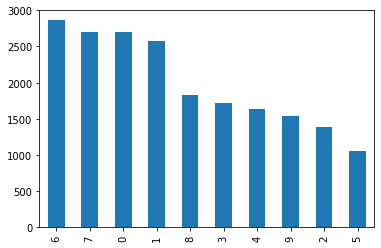

<AxesSubplot:>

In [0]:
data['Topic'].value_counts().plot.bar()